<a href="https://colab.research.google.com/github/andersonjhones/An-lise-de-dados/blob/main/An%C3%A1lise_de_um_inversor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Carregando os Pacotes Usados Neste Notebook**.

In [1]:
# Importações para manipulação de dados
import numpy as np
import pandas as pd
import itertools
from pandas import Series

# Importações para visualização de dados
import matplotlib.pyplot as plt
import matplotlib as m
import statistics as st
import plotly.express as px
from scipy.stats import norm 
import math as mt

# Importações análise e modelagem de séries temporais
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



**Conjunto de dados de um inversor de 3 kW**.

Este conjunto de dados trás informações como potência, tensão e corrente de um inversor utilizado em um sistema fotovoltaico (sistema de energia solar), registradas de 5 em 5 minutos no período de um mês. De início o arquivo irá conter as análise dos dados selecionados para o estudo de caso, presentação de estatísticas descritivas dos dados como valor máximo e valor mínimo, média e desvio padrão, acréscimo de coluna no dataset e gráficos e teste de Dickey-Fuller para comprovar se a séria é ou não estacionária e a autocorrelação entre dados.

In [3]:
#Carregamento dos dados
arquivo = pd.read_excel('/content/drive/MyDrive/inversor/inversor.xlsx')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Visulização dos dados
arquivo.head(1)

,Time,Ppv,Ppv1(W),Ppv2(W),Pex2(W),Pac,TimeTotal(H),Vpv1(V),Ipv1(A),Vpv2(V),Ipv2(A),fac(Hz),Vac1(V),Iac1(A),Pac1(W),EacToday,EacTotal,Epv1Today(kWh),Epv2Today(kWh),Epv3Today(kWh),Eex1Today(kWh),Eex2Today(kWh),Temp1,Temp2,Temp3,Temp4,Temp5,PBusVoltage(V),NBusVoltage(V),OpFullwatt,InvDelayTime,Pf,DciR(mA),DciS(mA),DciT(mA),SysFaultWord,SysFaultWord1,SysFaultWord2,SysFaultWord3,SysFaultWord4,SysFaultWord5,SysFaultWord6,SysFaultWord7,FaultType,WarnCode,realOPPercent,DeratingMode,BdcStatus,DryContactStatus,LoadPercent,UwSysWorkMode,Gfci(mA),Iso(K?),EtoUserToday(kWh),EtoUserTotal(kWh),EtoGridToday(kWh),EtoGridTotal(kWh),ElocalLoadToday(kWh),ElocalLoadTotal(kWh),Epv1Total(kWh),Epv2Total(kWh),EpvTotal(kWh),Eex1Total(kWh),Eex2Total(kWh),debug1,debug2,Pself(W),Psystem(W),EselfToday(kWh),EselfTotal(kWh),EsystemToday(kWh),EsystemTotal(kWh),IsAgain
0,2021-09-01 05:39:00,0.0,0.0,0,0,0.0,9.4,273.1,0.0,0,0,60.0,215.1,0.1,0.0,0.0,57.6,0.0,0,0,0,0,25.6,0,0,0,31.2,274.9,0,0,27,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,15,0,0,0,0,104,791,0,0,0,0,0,0,57.9,0,57.9,0,0,8?84?15?2751?3600?0?256?0,0?0?0?0?0?0?0?0,0,0,0,0,0,0,False


In [5]:
#Shape do dataset com 4425 linhas e 73 colunas
arquivo.shape

(4425, 73)

In [6]:
arquivo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4425 entries, 0 to 4424
Data columns (total 73 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Time                  4425 non-null   datetime64[ns]
 1   Ppv                   4425 non-null   float64       
 2   Ppv1(W)               4425 non-null   float64       
 3   Ppv2(W)               4425 non-null   int64         
 4   Pex2(W)               4425 non-null   int64         
 5   Pac                   4425 non-null   float64       
 6   TimeTotal(H)          4425 non-null   float64       
 7   Vpv1(V)               4425 non-null   float64       
 8   Ipv1(A)               4425 non-null   float64       
 9   Vpv2(V)               4425 non-null   int64         
 10  Ipv2(A)               4425 non-null   int64         
 11  fac(Hz)               4425 non-null   float64       
 12  Vac1(V)               4425 non-null   float64       
 13  Iac1(A)           

In [7]:
#arquivo.value_counts()

**Foram excluídas algumas colunas porque boa parte estavam zeradas e outras não interessavam na análise a ser feita neste trabalho**.

In [8]:
#Exclusão de colunas do dataset
#arquivo = arquivo.drop(columns=['Ppv2(W)'])
arquivo.drop('Ppv2(W)', axis=1,inplace=True)
arquivo.drop('Pex2(W)', axis=1,inplace=True)
arquivo.drop('Vpv2(V)', axis=1,inplace=True)
arquivo.drop('Ipv2(A)', axis=1,inplace=True)
arquivo.drop('Epv2Today(kWh)', axis=1,inplace=True)
arquivo.drop('Epv3Today(kWh)', axis=1,inplace=True)
arquivo.drop('Eex1Today(kWh)', axis=1,inplace=True)
arquivo.drop('Eex2Today(kWh)', axis=1,inplace=True)
arquivo.drop('Temp2', axis=1,inplace=True)
arquivo.drop('Temp3', axis=1,inplace=True)
arquivo.drop('Temp4', axis=1,inplace=True)
arquivo.drop('NBusVoltage(V)', axis=1,inplace=True)
arquivo.drop('OpFullwatt', axis=1,inplace=True)
arquivo.drop('DciS(mA)', axis=1,inplace=True)
arquivo.drop('DciT(mA)', axis=1,inplace=True)
arquivo.drop('SysFaultWord', axis=1,inplace=True)
arquivo.drop('SysFaultWord1', axis=1,inplace=True)
arquivo.drop('SysFaultWord2', axis=1,inplace=True)
arquivo.drop('SysFaultWord3', axis=1,inplace=True)
arquivo.drop('SysFaultWord4', axis=1,inplace=True)
arquivo.drop('SysFaultWord5', axis=1,inplace=True)
arquivo.drop('SysFaultWord6', axis=1,inplace=True)
arquivo.drop('SysFaultWord7', axis=1,inplace=True)
arquivo.drop('FaultType', axis=1,inplace=True)
arquivo.drop('WarnCode', axis=1,inplace=True)
arquivo.drop('BdcStatus', axis=1,inplace=True)
arquivo.drop('DryContactStatus', axis=1,inplace=True)
arquivo.drop('LoadPercent', axis=1,inplace=True)
arquivo.drop('UwSysWorkMode', axis=1,inplace=True)
arquivo.drop('EtoUserToday(kWh)', axis=1,inplace=True)
arquivo.drop('EtoUserTotal(kWh)', axis=1,inplace=True)
arquivo.drop('EtoGridToday(kWh)', axis=1,inplace=True)
arquivo.drop('EtoGridTotal(kWh)', axis=1,inplace=True)
arquivo.drop('ElocalLoadToday(kWh)', axis=1,inplace=True)
arquivo.drop('ElocalLoadTotal(kWh)', axis=1,inplace=True)
arquivo.drop('Epv2Total(kWh)', axis=1,inplace=True)
arquivo.drop('Eex1Total(kWh)', axis=1,inplace=True)
arquivo.drop('Eex2Total(kWh)', axis=1,inplace=True)
arquivo.drop('debug1', axis=1,inplace=True)
arquivo.drop('debug2', axis=1,inplace=True)
arquivo.drop('Pself(W)', axis=1,inplace=True)
arquivo.drop('Psystem(W)', axis=1,inplace=True)
arquivo.drop('EselfToday(kWh)', axis=1,inplace=True)
arquivo.drop('EselfTotal(kWh)', axis=1,inplace=True)
arquivo.drop('EsystemToday(kWh)', axis=1,inplace=True)
arquivo.drop('EsystemTotal(kWh)', axis=1,inplace=True)
arquivo.drop('IsAgain', axis=1,inplace=True)
arquivo.drop('TimeTotal(H)', axis=1,inplace=True)
arquivo.drop('EacToday', axis=1,inplace=True)
arquivo.drop('Epv1Today(kWh)', axis=1,inplace=True)
arquivo.drop('InvDelayTime', axis=1,inplace=True)
arquivo.drop('DciR(mA)', axis=1,inplace=True)
arquivo.drop('realOPPercent', axis=1,inplace=True)
arquivo.drop('DeratingMode', axis=1,inplace=True)
arquivo.drop('Gfci(mA)', axis=1,inplace=True)
arquivo.drop('Iso(K?)', axis=1,inplace=True)
arquivo.drop('EacTotal', axis=1,inplace=True)
arquivo.drop('Epv1Total(kWh)', axis=1,inplace=True)
arquivo.drop('EpvTotal(kWh)', axis=1,inplace=True)
arquivo.drop('Pac1(W)', axis=1,inplace=True)
arquivo.drop('Ppv1(W)', axis=1,inplace=True)

In [9]:
#Visualização do dataset após retiradas algumas das colunas 
arquivo.head(1)

,Time,Ppv,Pac,Vpv1(V),Ipv1(A),fac(Hz),Vac1(V),Iac1(A),Temp1,Temp5,PBusVoltage(V),Pf
0,2021-09-01 05:39:00,0.0,0.0,273.1,0.0,60.0,215.1,0.1,25.6,31.2,274.9,1


In [ ]:
#Shape do dataset atual
arquivo.shape

(4425, 12)

**Acrescentou-se mais uma coluna ao dataset, visando obsercar o rendimento de potência, ou seja o percentual de potência de saída em relação à entrada**.

In [10]:
#Nova coluna
arquivo['rendimento']=arquivo['Pac']/arquivo['Ppv']
arquivo['rendimento']

0            NaN
1            NaN
2       0.980907
3       0.978610
4       0.980882
          ...   
4420    0.983607
4421    0.977941
4422    0.989899
4423    0.988889
4424    1.000000
Name: rendimento, Length: 4425, dtype: float64

**Quando a divisão foi feita haviam valores que ficaram 0/0 e foi mostrado no dataset valores Not a Number (NaN), então trocou-se os Valores NaN por zero. Esses casos aconteceram quando não estava havendo geração de potêmcia, isto é, não tinha potência de entrada nem de saída no momento**.

In [11]:
arquivo['rendimento']=arquivo['rendimento'].fillna(0)

In [12]:
#Visualização da nova coluna criada
arquivo['rendimento']

0       0.000000
1       0.000000
2       0.980907
3       0.978610
4       0.980882
          ...   
4420    0.983607
4421    0.977941
4422    0.989899
4423    0.988889
4424    1.000000
Name: rendimento, Length: 4425, dtype: float64

**Exclusão de todos valores NaN em todas as linhas se existirem**

In [13]:
arquivo.dropna(how='all')

,Time,Ppv,Pac,Vpv1(V),Ipv1(A),fac(Hz),Vac1(V),Iac1(A),Temp1,Temp5,PBusVoltage(V),Pf,rendimento
0,2021-09-01 05:39:00,0.0,0.0,273.1,0.0,60.0,215.1,0.1,25.6,31.2,274.9,1,0.000000
1,2021-09-01 05:44:00,0.0,0.0,282.5,0.0,60.0,215.0,0.1,25.9,33.9,285.3,1,0.000000
2,2021-09-01 05:49:00,41.9,41.1,256.7,0.1,60.0,213.7,0.4,26.3,35.2,360.3,1,0.980907
3,2021-09-01 05:54:00,56.1,54.9,262.1,0.2,60.0,215.0,0.7,27.4,36.5,360.4,1,0.978610
4,2021-09-01 05:59:00,68.0,66.7,276.0,0.2,60.0,214.7,0.9,28.5,37.6,360.1,1,0.980882
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4420,2021-09-30 17:25:00,18.3,18.0,221.2,0.0,60.0,212.2,0.4,50.2,59.0,360.2,1,0.983607
4421,2021-09-30 17:30:00,13.6,13.3,200.8,0.0,60.0,210.1,0.5,50.1,58.8,360.3,1,0.977941
4422,2021-09-30 17:35:00,9.9,9.8,196.0,0.0,60.0,209.1,0.3,49.8,58.6,360.4,1,0.989899
4423,2021-09-30 17:40:00,9.0,8.9,171.1,0.0,60.0,205.5,0.4,49.3,58.3,360.4,1,0.988889


**Foram geradas algumas estatísticas descritivas das colunas do dataset utilizando um loop for. O loop mostra valores de média, mediana, valor mínimo e valor máximo das grandezas elétricas analizadas neste notbook.**

In [14]:
arquivo['rendimento'].replace(1.2149493243243241,1, inplace=True)
arquivo['rendimento'].replace(1.1688311688311688,1, inplace=True)
arquivo['rendimento'].replace(1.0304190377651319,1, inplace=True)
arquivo['rendimento'].replace(1.0222222222222221,1, inplace=True)
arquivo['rendimento'].replace(1.014388489208633,1, inplace=True)
arquivo['rendimento'].replace(1.0113636363636362,1, inplace=True)
arquivo['rendimento'].replace(1.0112359550561798,1, inplace=True)
arquivo['rendimento'].replace(1.0101010101010102,1, inplace=True)
arquivo['rendimento'].replace(1.0073211314475874,1, inplace=True)
arquivo['rendimento'].replace(1.0072463768115942,1, inplace=True)
arquivo['rendimento'].replace(1.0057142857142858,1, inplace=True)



In [15]:
for coluna in range(1):
  print('+++++Estatísticas Descritivas+++++')
  print('Média = \n' ,  arquivo.mean())
  print('Mediana = \n', arquivo.median())
  print('Valor Mínimo = \n', arquivo.min())
  print('Valor Máximo = \n', arquivo.max())

+++++Estatísticas Descritivas+++++
Média = 
 Ppv               1195.511412
Pac               1171.778734
Vpv1(V)            256.778079
Ipv1(A)              4.718780
fac(Hz)             60.000972
Vac1(V)            213.542621
Iac1(A)              5.519887
Temp1               56.971119
Temp5               62.180136
PBusVoltage(V)     358.395119
Pf                   1.000000
rendimento           0.960210
dtype: float64
Mediana = 
 Ppv               1246.400000
Pac               1220.100000
Vpv1(V)            255.300000
Ipv1(A)              4.900000
fac(Hz)             60.000000
Vac1(V)            213.500000
Iac1(A)              5.800000
Temp1               59.800000
Temp5               64.000000
PBusVoltage(V)     360.000000
Pf                   1.000000
rendimento           0.980046
dtype: float64
Valor Mínimo = 
 Time              2021-09-01 05:39:00
Ppv                                 0
Pac                                 0
Vpv1(V)                          69.9
Ipv1(A)                 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



In [16]:
arquivo.shape

(4425, 13)

**Gráficos de Boxplot.** \\
Foram plotados alguns gráficos boxplots com o intuito de vericar onde os dados estão mais concentrados, a potência de entrada por exemplo está em torno de 1200 W de média. Também foram observados dados mostrados como outliers, no entanto esses valores não foram excluídos pela natureza deste sistema de energia (energia solar), pois esses valores considerados discrepantes são mais na parte inferior, considerando a tensão de entrada no gráfico 3, e a explicação é que nesses momentos, e são vários momentos, a gereção de energia estava baixa, seja pelo horário e pela irradiação solar, além de que essas quedas de tensão podem ser causadas por sombreamento nos paineis solares, seja por árvores, prédios, etc. Então esses valores são considerados dentro de uma normalidade especificada até mesmo no manual do inversor utilizado. Já o rendimento, que se trata da potência de saída dividida pela potência de entrada, está acima de 96%, por isso a concentração e a própria média vista no gráfico em torno desse valor. 

{'boxes': [<matplotlib.lines.Line2D at 0x7fc843dbab90>],
 'caps': [<matplotlib.lines.Line2D at 0x7fc843dc2bd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fc843dc8c10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fc843dc86d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fc843dc2150>,
  <matplotlib.lines.Line2D at 0x7fc843dc2690>]}

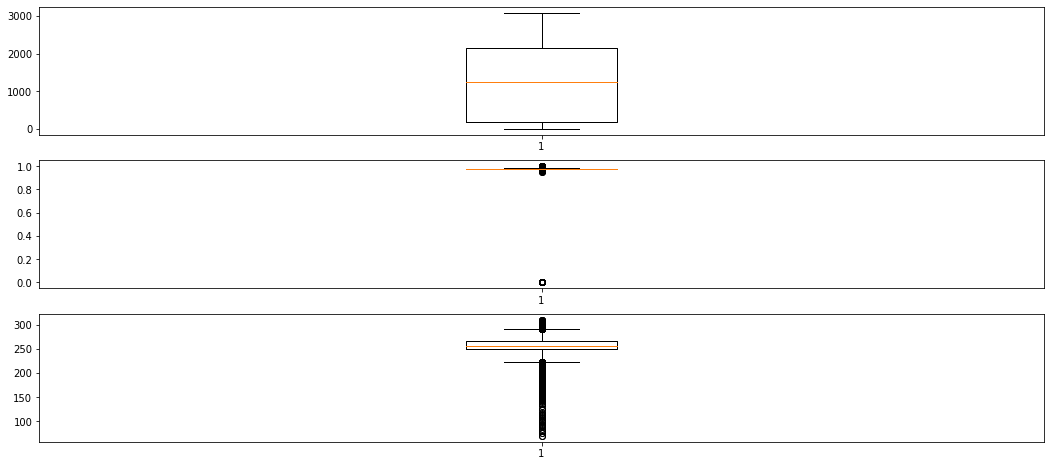

In [17]:
plt.figure(figsize=(18,8))
plt.subplot(311)
plt.boxplot(arquivo['Ppv'])
plt.subplot(312)
plt.boxplot(arquivo['rendimento'])
plt.subplot(313)
plt.boxplot(arquivo['Vpv1(V)'])



In [18]:
#  
arquivo['Time'] = pd.to_datetime(arquivo['Time'])

In [19]:
#Ciando a variável arquivo séries e colocando Time como índice
arquivo_series = arquivo.set_index('Time')

**Criando gráfico para observar a potência de entrada original, média móvel e desvio padrão.** \\
No gráfico percebe-se que a média e o desvio padrão são constantes ao longo do tempo, portanto pode-se considerar a série como estacionária.

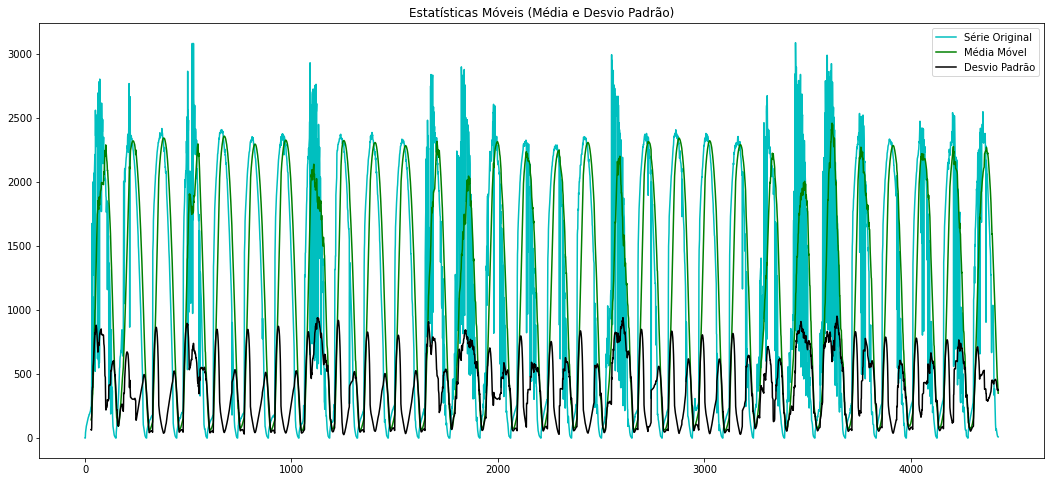

In [24]:
# Prepara os dados de potência
x = arquivo['Time'].values
y = arquivo['Ppv'].values

# Estatísticas móveis (média móvel e desvio padrão)
rolmean = arquivo['Ppv'].rolling(window = 30).mean()
rolstd = arquivo['Ppv'].rolling(window = 30).std()

# Visualização das estatísticas móveis
plt.figure(figsize=(18,8))
orig = plt.plot(y, color = 'c', label = 'Série Original')
mean = plt.plot(rolmean, color = 'g', label = 'Média Móvel')
std = plt.plot(rolstd, color = 'black', label = 'Desvio Padrão')
plt.legend(loc = 'best')
plt.title('Estatísticas Móveis (Média e Desvio Padrão)')
plt.show()

**Criação dos gráficos da função de autocorrelação e da função de autocorrelação parcial** \\
Os valores próximos a 1 indicam que a série não é aleatória, ou seja os dados se relacionam. As barras no gráfico FAC (Função de autocorrelação) representam o nível de correlação entre a série e seus atrasos na ordem que cada um dos elementos ocorreu no tempo. A área sombreada em azul mostra se o nível de correlação entre a série e cada atraso é considerável ou não.

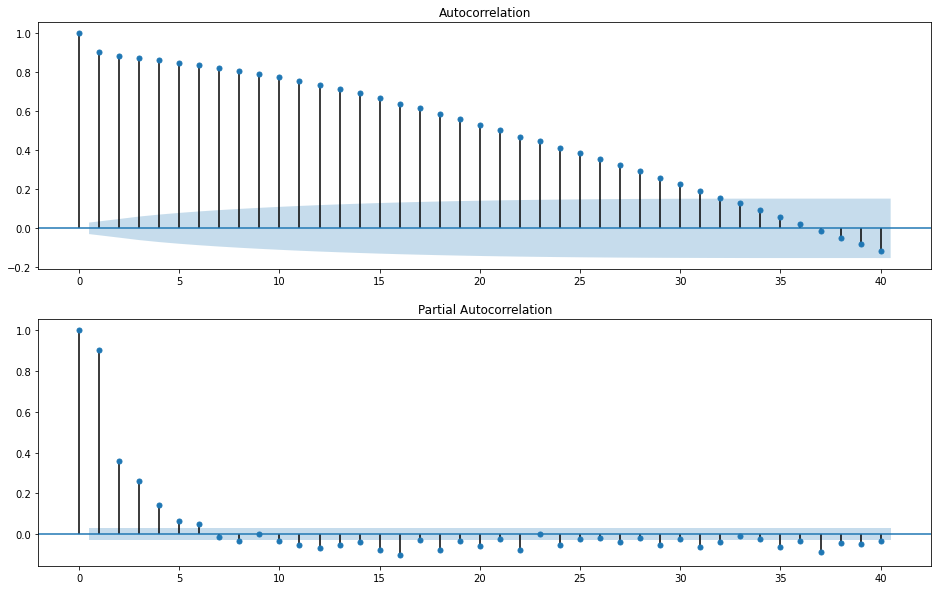

In [27]:
# Plots
plt.rcParams.update({'figure.figsize': (16,10)})

# Plot do gráfico de Função de Autocorrelação
plt.subplot(211)
plot_acf(arquivo.Ppv, ax = plt.gca(), lags = 40)

# Plot do gráfico de Função de Autocorrelação Parcial
plt.subplot(212)
plot_pacf(arquivo.Ppv, ax = plt.gca(), lags = 40)
plt.show()

**Teste de Dickey-Fuller** \\
Teste par avaliar a estacionaridade da série temporal. Hipótese nula: a série temporal não é estacionária.
Caso obtenha-se um um valor-p abaixo de 0.05 rejeita-se a hipótese nula e isto indicará estacionaridade.

In [28]:
# Teste de Dickey-Fuller

# Print
print('\nResultado do Teste de Dickey-Fuller:\n')

# Teste
arquivo_teste = adfuller(arquivo.Ppv, autolag = 'AIC')

# Formatando a saída
arquivo_saida_teste = pd.Series(arquivo_teste[0:4], index = ['Estatísticas do Teste de Dickey-Fuller',
                                           'Valor-p',
                                           'Número de Lags Considerados',
                                           'Número de Observações Usadas'])

# Loop for para cada item da saída do teste
for solucao,valor in arquivo_teste[4].items():
    arquivo_saida_teste['Valor Crítico (%s)'%solucao] = valor

# Print
print (arquivo_saida_teste)


Resultado do Teste de Dickey-Fuller:

Estatísticas do Teste de Dickey-Fuller   -1.301886e+01
Valor-p                                   2.477901e-24
Número de Lags Considerados               3.100000e+01
Número de Observações Usadas              4.393000e+03
Valor Crítico (1%)                       -3.431839e+00
Valor Crítico (5%)                       -2.862198e+00
Valor Crítico (10%)                      -2.567120e+00
dtype: float64


In [29]:
arquivo=arquivo.set_index('Time')

**Visualização dos gráficos**

**Gráfico da potência em corrente contínua gerada pelos painéis fotovoltaicos com 0 Watts (para momentos sem geração de energia), até um pico máximo de 3085,6 Watts. A potência CC segue o esperado para a geração. A média está em torno de 1200 Watts e mediana bem próxima a este valor, por volta de 1250 Watts.**

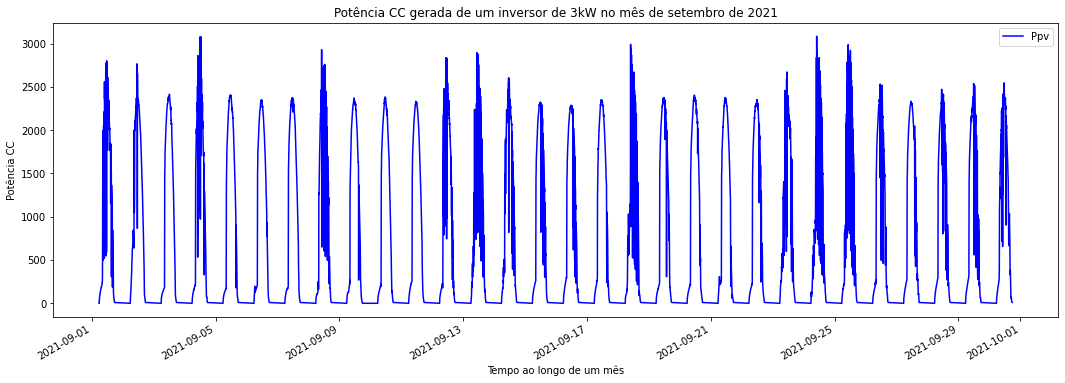

In [30]:
Grafico_Ppv = arquivo[['Ppv']]
ax = Grafico_Ppv.plot(color = 'b', figsize = (18,6))
plt.xlabel("Tempo ao longo de um mês")
plt.ylabel('Potência CC')
plt.title("Potência CC gerada de um inversor de 3kW no mês de setembro de 2021")
plt.show()

**Gráfico da potência em corrente alternada (potência após a inversão de CC Para CA), 0 Watts (para momentos sem geração de energia, até um pico máximo de 3023,9 Watts. A média está em torno de 1170 Watts e mediana bem próxima a este valor, por volta de 1220 Watts. A potência CA segue o esperado para a geração já que o inversor foi projetado para uma potência de 3kW**.

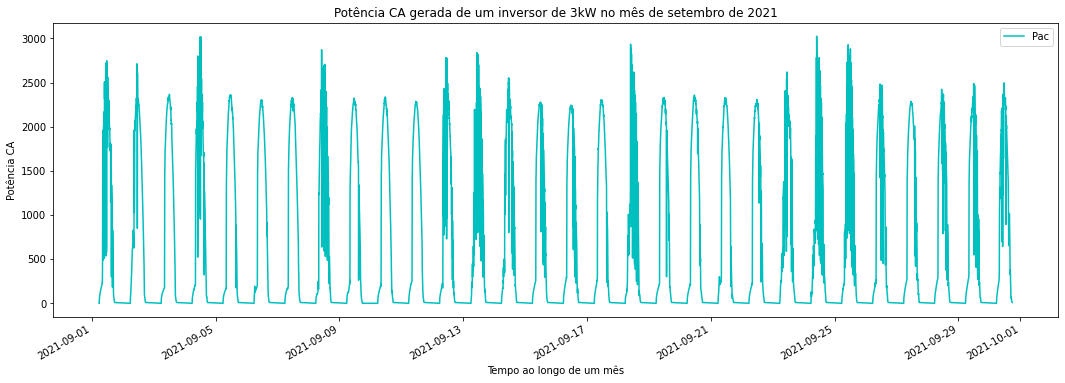

In [31]:
Grafico_Ppv = arquivo[['Pac']]
ax = Grafico_Ppv.plot(color = 'c', figsize = (18,6))
plt.xlabel("Tempo ao longo de um mês")
plt.ylabel('Potência CA')
plt.title("Potência CA gerada de um inversor de 3kW no mês de setembro de 2021")
plt.show()

**Coluna de rendimento criada e observada em gráfico para comparação das potências de entrada e de saída**. **O rendimento especificado como valor máximo pelo fabricante é 97,6, no entanto em alguns momentos o rendimento foi registrado como 100 por cento ou valor 1, com média de 0,96, mediana de 0,98, valor mínimo de 0 (momento sem geração) e valor máximo de 1 eficiência de 100% por cento.**

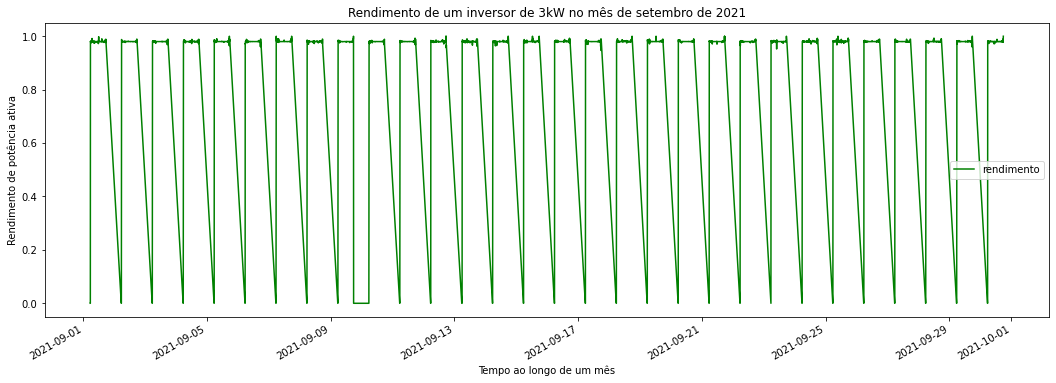

In [32]:
Grafico_Ppv = arquivo[['rendimento']]
ax = Grafico_Ppv.plot(color = 'g', figsize = (18,6))
plt.xlabel("Tempo ao longo de um mês")
plt.ylabel('Rendimento de potência ativa')
plt.title("Rendimento de um inversor de 3kW no mês de setembro de 2021")
plt.show()

**Tensão CC advinda dos painéis solares.** **A mínima tensão CC medida no inversor foi 69,9 Volts e a máxima tensão CC registrada foi de 310,4 V. O valor máximo de tensão permitido pelo inversor é 550 V. Tento uma faixa de variação de 65 a 550 Volts. A média e a mediana foram valores bem próximos com aproximadamente 257 e 255 Volts, respectivamente.**

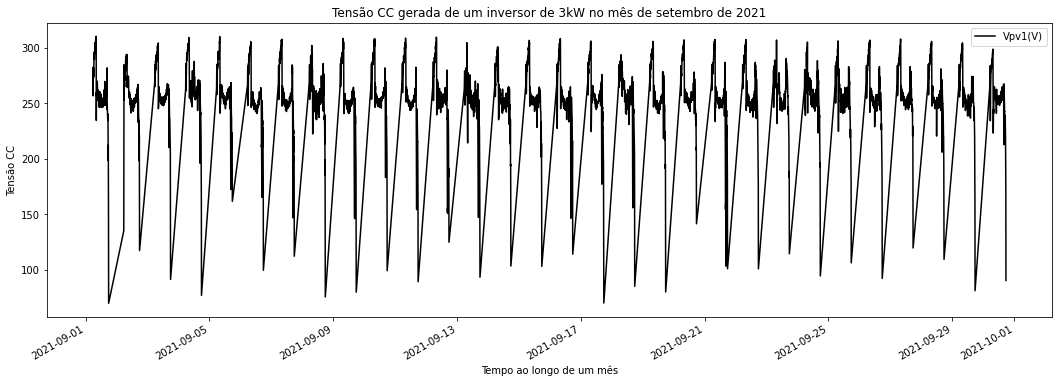

In [33]:
Grafico_Ppv = arquivo[['Vpv1(V)']]
ax = Grafico_Ppv.plot(color = 'k', figsize = (18,6))
plt.xlabel("Tempo ao longo de um mês")
plt.ylabel('Tensão CC')
plt.title("Tensão CC gerada de um inversor de 3kW no mês de setembro de 2021")
plt.show()

**A corrente contínua máxima permitida pelo manual é 13 Aperes e a mínima corente foi de 0 Amperes (momento sem geração de energia) e a máxima registrada foi 12,2 A, com média e mediana de 4,7 e 4,9, nesta ordem. Estando, assim, o valor de corrente dentro dos padrões exigidos para um bom funcionamento.**

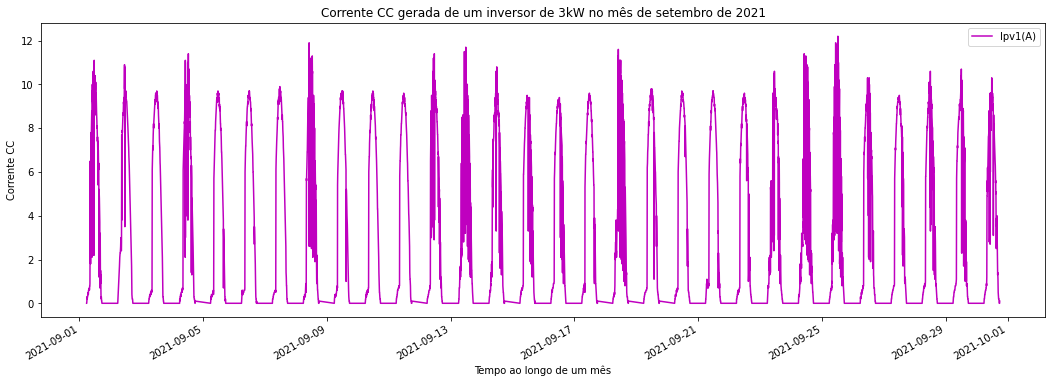

In [34]:
Grafico_Ppv = arquivo[['Ipv1(A)']]
ax = Grafico_Ppv.plot(color = 'm', figsize = (18,6))
plt.xlabel("Tempo ao longo de um mês")
plt.ylabel('Corrente CC')
plt.title("Corrente CC gerada de um inversor de 3kW no mês de setembro de 2021")
plt.show()

**A frequência de saída do inversor (frequência em corrente alternada), variou de 59,8 a 60,1 Hz, valores estes aceitáveis por normas de regulamentação de energia, que é de +/- 0,5 Hz para evitar mau funcionamento e/ou queima de equipamentos**.

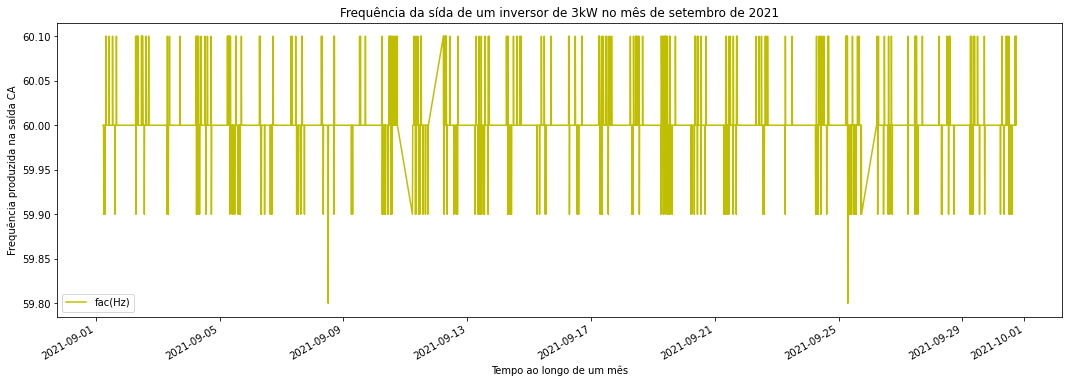

In [35]:
Grafico_Ppv = arquivo[['fac(Hz)']]
ax = Grafico_Ppv.plot(color = 'y', figsize = (18,6))
plt.xlabel("Tempo ao longo de um mês")
plt.ylabel('Frequência produzida na saída CA')
plt.title("Frequência da sída de um inversor de 3kW no mês de setembro de 2021")
plt.show()

**A faixa de tensão nominal de saída encontrada no datasheet do inversor é de 180 a 280 V_{AC}. O mínimo registrado foi 202,5 Volts, com um máximo de 222,5 Volts.**

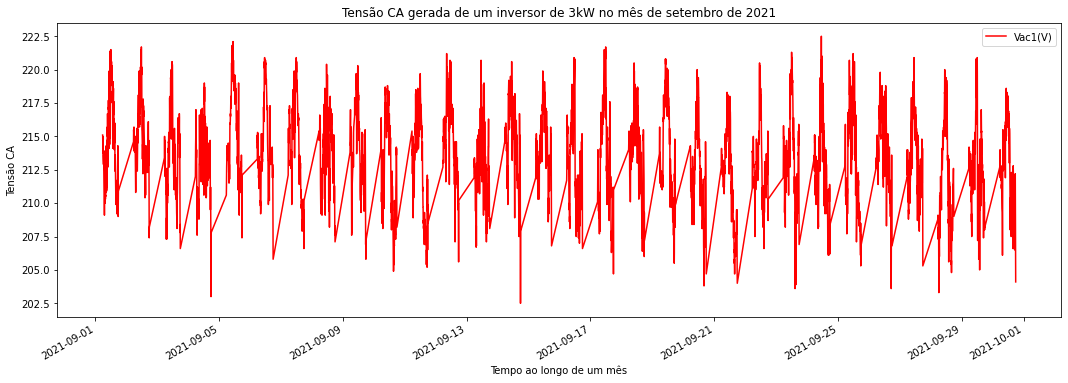

In [36]:
Grafico_Ppv = arquivo[['Vac1(V)']]
ax = Grafico_Ppv.plot(color = 'r', figsize = (18,6))
plt.xlabel("Tempo ao longo de um mês")
plt.ylabel('Tensão CA')
plt.title("Tensão CA gerada de um inversor de 3kW no mês de setembro de 2021")
plt.show()

**Em relação à corrente de saída a máxima permitida é 14,3 A e os valores de mínimo e máximo resgistrados foram 0,1 A (considerado circuito aberto, sem geração e portanto sem alimentação do circuito) e 13,6 A.**

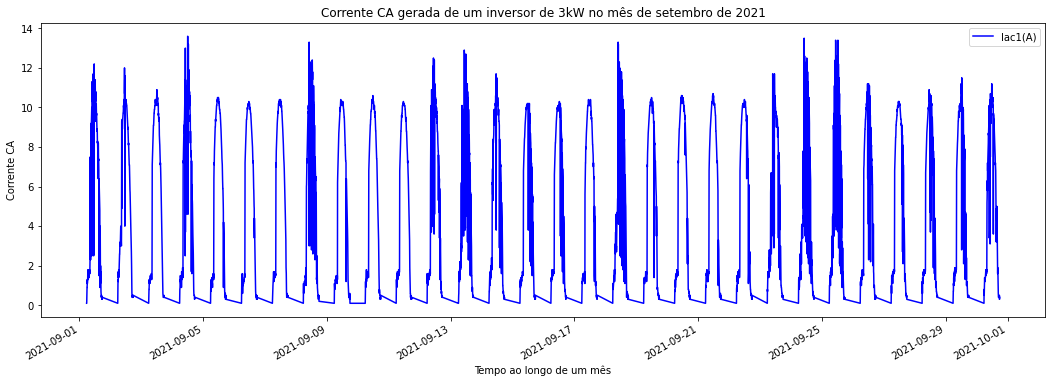

In [37]:
Grafico_Ppv = arquivo[['Iac1(A)']]
ax = Grafico_Ppv.plot(color = 'b', figsize = (18,6))
plt.xlabel("Tempo ao longo de um mês")
plt.ylabel('Corrente CA')
plt.title("Corrente CA gerada de um inversor de 3kW no mês de setembro de 2021")
plt.show()

**Tensão do barramento de corrente contínua com valor mínimo de 265,5 V e máximo de 361,9 V.**




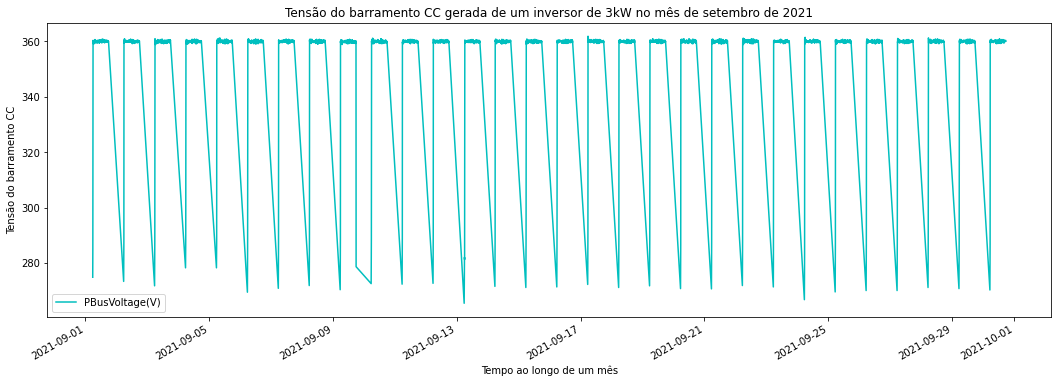

In [38]:
Grafico_Ppv = arquivo[['PBusVoltage(V)']]
ax = Grafico_Ppv.plot(color = 'c', figsize = (18,6))
plt.xlabel("Tempo ao longo de um mês")
plt.ylabel('Tensão do barramento CC')
plt.title("Tensão do barramento CC gerada de um inversor de 3kW no mês de setembro de 2021")
plt.show()

**O fator de potência registrado ficou em nível unitário, o que é ótimo, pois toda a potência está sendo usada em forma ativa Watts e não em potência aparente S=W+Q, em que Q é a potência reativa (usada apenas para criar e manter os campos eletromagnéticos das cargas indutivas).**

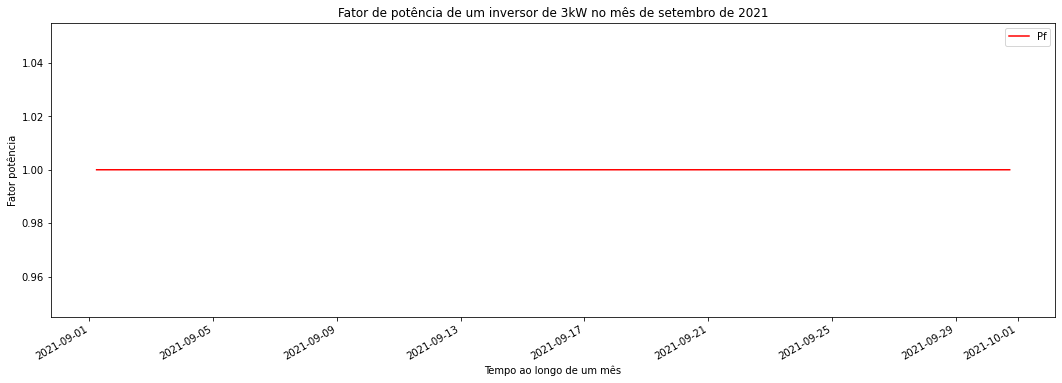

In [39]:
Grafico_Ppv = arquivo[['Pf']]
ax = Grafico_Ppv.plot(color = 'r', figsize = (18,6))
plt.xlabel("Tempo ao longo de um mês")
plt.ylabel('Fator potência')
plt.title("Fator de potência de um inversor de 3kW no mês de setembro de 2021")
plt.show()

**Pode-se obervar nos gráficos abaixo as temperaturas internas do inversor. A temperatura interna varia desde aproximadamente 25 a 80 graus celsius no gráfico em azul e de 30 a 80 graus no gráfico em verde. São valores aceitáveis de temperatura, para até uns 75 graus o resfriador interno  não é acionado e para temperaturas maiores que 75 e menores que 110 graus o resfriador é ligado, já para temperaturas iguais ou maiores que 110 graus celsius o inversor desliga.**

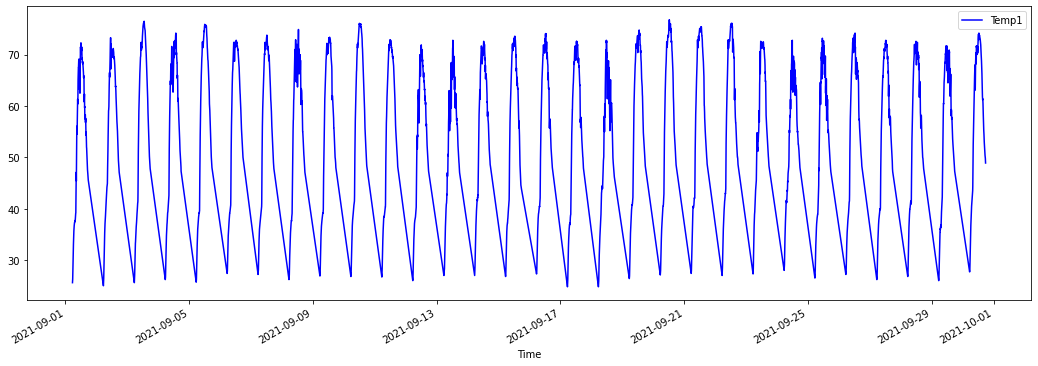

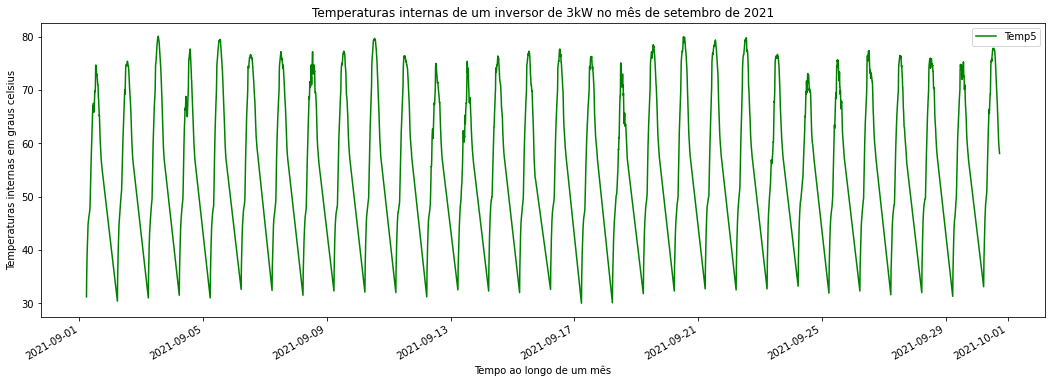

In [40]:
Grafico_Ppv = arquivo[['Temp1']]
Grafico_Ppv1 = arquivo[['Temp5']]
ax = Grafico_Ppv.plot(color = 'b', figsize = (18,6))
bx = Grafico_Ppv1.plot(color = 'g', figsize = (18,6))
plt.xlabel("Tempo ao longo de um mês")
plt.ylabel('Temperaturas internas em graus celsius')
plt.title("Temperaturas internas de um inversor de 3kW no mês de setembro de 2021")
plt.show()